In [273]:
import pandas as pd 
import glob
from sklearn.model_selection import train_test_split 
import plotly.graph_objs as go
import matplotlib as plt
import plotly as pl 
import numpy as np
import bokeh 
import pandas_datareader.data as web
from datetime import *
from plotly.graph_objs import Scatter, Layout
from fbprophet import Prophet

In [274]:
pl.tools.set_credentials_file(username='HerbertGourout', api_key='rCfamr0DHh0nnioBytM9')

In [275]:
path = r'data'
allfile =  glob.glob(path+'/*.csv')
#df=pd.read_json(Allfile[0],orient='index')
allfile

['data/CAC40-5YEARS.csv', 'data/CAC40-1YEAR.csv']

In [276]:
dfs=[]
for file in allfile:
    dfs.append(pd.read_csv(file))
    
train_data = pd.concat(dfs,ignore_index=True)

In [277]:
"""
dfs=[]
for file in allfile:
    dfs.append(pd.read_json(file,orient='records'))
    
train_data = pd.concat(dfs,ignore_index=True)"""

"\ndfs=[]\nfor file in allfile:\n    dfs.append(pd.read_json(file,orient='records'))\n    \ntrain_data = pd.concat(dfs,ignore_index=True)"

### Les plots

In [278]:
df= train_data
trace1=go.Scatter(x=df.Date, y=df['Open'], name="Open", line = dict(color = '#17BECF'), opacity = 0.8)
trace2=go.Scatter(x=df.Date, y=df['High'], name="HIGH", line=dict(color='#7F7F7F'), opacity=0.8)
trace3=go.Scatter(x=df.Date, y=df['Close'], name="Close", line=dict(color='red'), opacity=0.8)
trace4=go.Scatter(x=df.Date, y=df['Low'], name="Low", line = dict(color = '#33CFA5'), opacity = 0.8)

### Add mean to graph

In [279]:
trace_1_avg = go.Scatter(x=df.Date,
                            y=[df.Open.mean()]*len(df.Date),
                            name='Open Average',
                            visible=False,
                            line=dict(color='#17BECF', dash='dash'))

trace_2_avg = go.Scatter(x=df.Date,
                            y=[df.High.mean()]*len(df.Date),
                            name='High Average',
                            visible=False,
                            line=dict(color='#7F7F7F', dash='dash'))

trace_3_avg = go.Scatter(x=df.Date,
                            y=[df.Low.mean()]*len(df.Date),
                            name='Low Average',
                            visible=False,
                            line=dict(color='#red', dash='dash'))

trace_4_avg = go.Scatter(x=df.Date,
                            y=[df.Close.mean()]*len(df.Date),
                            name='Close Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))
data=[trace1,trace2,trace3,trace4]
data1=[trace2,trace_2_avg,trace3,trace_3_avg]


### Annotation

In [280]:
high_annotations=[dict(x='2018-03-01',
                       y=df.High.mean(),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(df.High.mean()),
                       ax=0, ay=-40),
                  dict(x=df.High.idxmax(),
                       y=df.High.max(),
                       xref='x', yref='y',
                       text='High Max:<br>'+str(df.High.max()),
                       ax=0, ay=-40)]
low_annotations=[dict(x='2013-05-01',
                      y=df.Low.mean(),
                      xref='x', yref='y',
                      text='Low Average:<br>'+str(df.Low.mean()),
                      ax=0, ay=40),
                 dict(x=df.High.idxmin(),
                      y=df.Low.min(),
                      xref='x', yref='y',
                      text='Low Min:<br>'+str(df.Low.min()),
                      ax=0, ay=40)]

### update menu

In [281]:
updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([   
            dict(label = 'High',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Yahoo High',
                          'annotations': high_annotations}]),
            dict(label = 'Low',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Yahoo Low',
                          'annotations': low_annotations}]),
            dict(label = 'Both',
                 method = 'update',
                 args = [{'visible': [True, True, True, True]},
                         {'title': 'Yahoo',
                          'annotations': high_annotations+low_annotations}]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [True, False, True, False]},
                         {'title': 'Yahoo',
                          'annotations': []}])
        ]),
    )
])

### add axis

In [282]:
layout2 = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)
    
layout = dict(title='Yahoo', showlegend=False,
              updatemenus=updatemenus)

#fig = dict(data=data1, layout=layout)
#fig2= dict(data=data,layout=layout2)
#pl.offline.plot(fig, filename = "Manually Set Range.html")
#pl.offline.plot(fig2, filename = "update_button'")


# model prophet

In [338]:

##  Creation de l'échantillon d'apprentissage générale ####
train_predict = train_data[0:int(0.7*len(train_data))]





/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

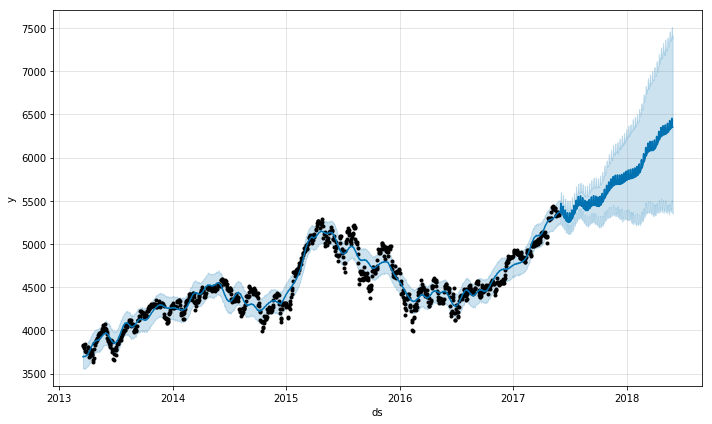

In [339]:
df1 = train_predict
df1['High_c']=df1['High']
df1['y'] =(df1['High'])
df1['ds']=df1['Date']
model = Prophet()

model.fit(df1);

future = model.make_future_dataframe(periods=365) 
forecast = model.predict(future)
figure=model.plot(forecast)


In [337]:
forecast_filtered = forecast.iloc[:train_predict.shape[0]]
train_predict.reset_index()
forecast_filtered.reset_index()
result = pd.concat([train_predict, forecast_filtered], axis=1, join_axes=[train_predict.index])


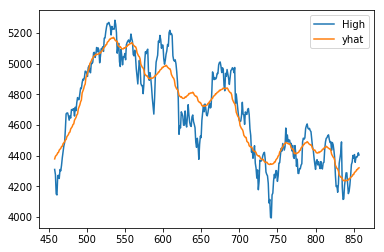

In [335]:

two_years = result[['High', 'yhat', 'yhat_upper', 'yhat_lower' ]].tail(400)

two_years[['High', 'yhat']].plot()

In [ ]:
"""
df1 = train_data
df1['Low_c']=df1['Low']
df1['y'] = np.log(df1['Low'])
df1['ds']=df1['Date']
model = Prophet()

model.fit(df1);

future = model.make_future_dataframe(periods=365) 
forecast = model.predict(future)
figure=model.plot(forecast)
"""